# EDA on BigMartSales Data

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
df=pd.read_csv(r'C:\\Users\Lenovo\OneDrive\Desktop\internship\Train.csv')
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [48]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [50]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## missing values

In [51]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [52]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Item_Weight', 'Outlet_Size']

In [69]:
sales=df.groupby(['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']).size().reset_index()
sales.head()

,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,0
0,Low Fat,Baking Goods,Tier 1,Grocery Store,38.6164,1
1,Low Fat,Baking Goods,Tier 1,Grocery Store,48.6034,1
2,Low Fat,Baking Goods,Tier 1,Grocery Store,89.8830,1
3,Low Fat,Baking Goods,Tier 1,Grocery Store,123.8388,1
4,Low Fat,Baking Goods,Tier 1,Grocery Store,135.8232,1


<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

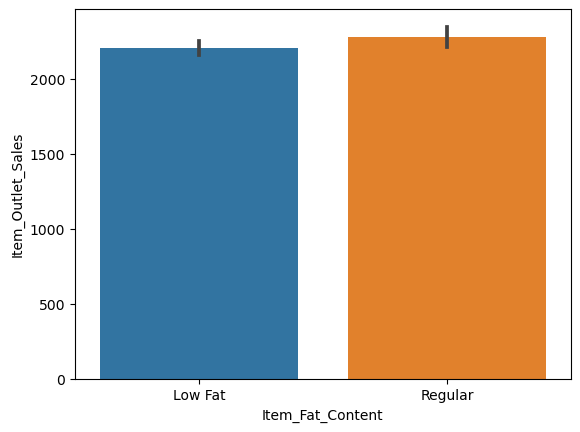

In [67]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=sales)

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

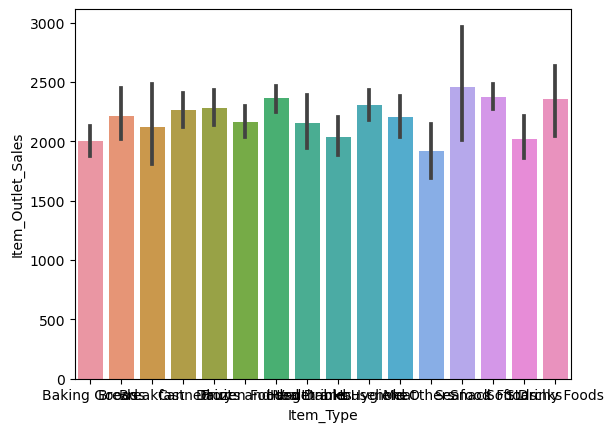

In [68]:
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=sales)

In [60]:
sales.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1060
Snack Foods              1002
Household                 764
Frozen Foods              737
Dairy                     600
Canned                    581
Baking Goods              566
Health and Hygiene        442
Meat                      391
Soft Drinks               384
Breads                    229
Hard Drinks               195
Others                    152
Starchy Foods             136
Breakfast                 108
Seafood                    55
Name: count, dtype: int64

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

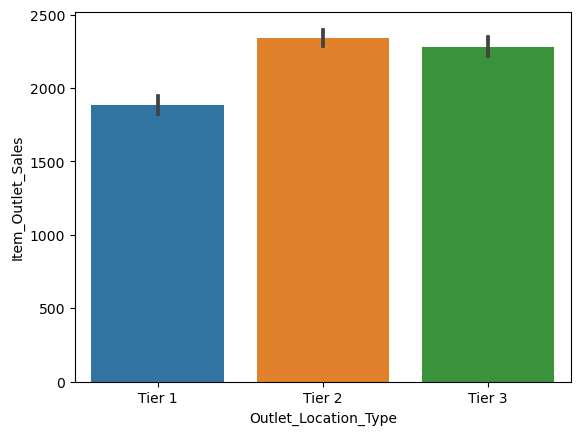

In [70]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=sales)

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

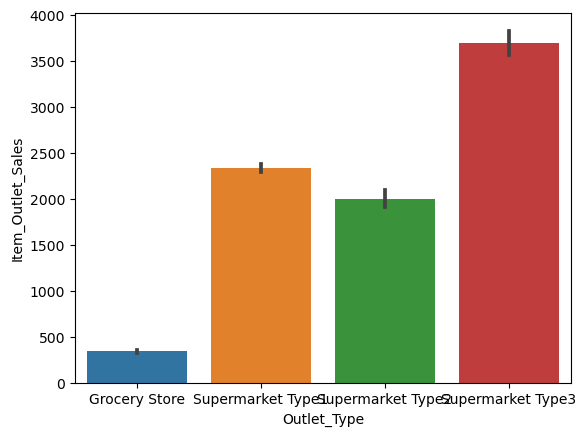

In [71]:
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=sales)